In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
df_bus=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Modbus.csv')
df_light=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Motion_Light.csv')
df_thermo=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Thermostat.csv')
df_weather=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Weather.csv')

In [ ]:
df_bus

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection
3,1556208842,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection
4,1556208844,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection
...,...,...,...,...,...,...,...,...,...
51101,1554183533,1-Apr-19,22:38:53,62602,1253,12772,29319,0,normal
51102,1554183536,1-Apr-19,22:38:56,62602,1253,12772,29319,0,normal
51103,1554183537,1-Apr-19,22:38:57,198,38266,33649,44594,0,normal
51104,1554183538,1-Apr-19,22:38:58,198,38266,33649,44594,0,normal


In [ ]:
df_bus['date']=pd.to_datetime(df_bus['date'])
df_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51106 entries, 0 to 51105
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ts                         51106 non-null  int64         
 1   date                       51106 non-null  datetime64[ns]
 2   time                       51106 non-null  object        
 3   FC1_Read_Input_Register    51106 non-null  int64         
 4   FC2_Read_Discrete_Value    51106 non-null  int64         
 5   FC3_Read_Holding_Register  51106 non-null  int64         
 6   FC4_Read_Coil              51106 non-null  int64         
 7   label                      51106 non-null  int64         
 8   type                       51106 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 3.5+ MB


In [ ]:
Time=df_bus.time.str.split(':')

In [ ]:
hh=[int(i[0]) for i in Time]
mm=[int(i[1]) for i in Time]
ss=[int(i[2]) for i in Time]
df_bus['hh']=hh
df_bus['mm']=mm
df_bus['ss']=ss

In [ ]:
df_bus['Month']=df_bus.date.dt.month
df_bus['Day']=df_bus.date.dt.day

In [ ]:
temp=df_bus['type']
df_bus.drop(['type','time','date'],axis=1,inplace=True)
df_bus['type']=temp

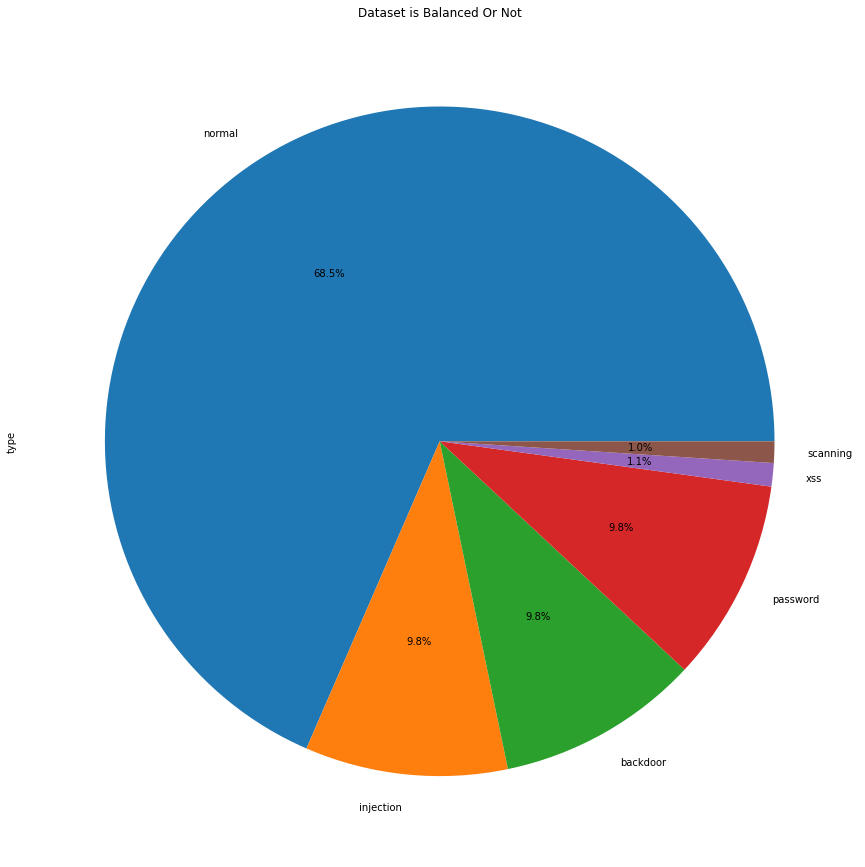

In [ ]:
df_bus['type'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f%%',title='Dataset is Balanced Or Not')

In [ ]:
All4=df_bus
labels=list(All4.type.value_counts().index)
All4['type']=LabelEncoder().fit_transform(All4['type'])
num=list(All4.type.value_counts().index)

In [ ]:
All4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51106 entries, 0 to 51105
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ts                         51106 non-null  int64
 1   FC1_Read_Input_Register    51106 non-null  int64
 2   FC2_Read_Discrete_Value    51106 non-null  int64
 3   FC3_Read_Holding_Register  51106 non-null  int64
 4   FC4_Read_Coil              51106 non-null  int64
 5   label                      51106 non-null  int64
 6   hh                         51106 non-null  int64
 7   mm                         51106 non-null  int64
 8   ss                         51106 non-null  int64
 9   Month                      51106 non-null  int64
 10  Day                        51106 non-null  int64
 11  type                       51106 non-null  int64
dtypes: int64(12)
memory usage: 4.7 MB


In [ ]:
X=All4.iloc[:,:-1]
y=All4.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.corr()

,ts,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,hh,mm,ss,Month,Day
ts,1.000000,-0.003546,-0.012115,-0.003588,0.002056,0.997152,-0.184777,-0.241780,0.012457,0.650551,0.165460
FC1_Read_Input_Register,-0.003546,1.000000,-0.011364,-0.003901,-0.001077,-0.003904,0.002129,0.007209,0.006047,0.006233,-0.011632
FC2_Read_Discrete_Value,-0.012115,-0.011364,1.000000,0.000475,0.002290,-0.011684,0.002353,0.002025,-0.004281,-0.011758,0.002998
FC3_Read_Holding_Register,-0.003588,-0.003901,0.000475,1.000000,0.004606,-0.002440,-0.012236,0.007377,0.006685,-0.016423,0.017745
FC4_Read_Coil,0.002056,-0.001077,0.002290,0.004606,1.000000,0.002332,-0.001081,-0.007314,-0.010586,0.002769,-0.001493
label,0.997152,-0.003904,-0.011684,-0.002440,0.002332,1.000000,-0.200013,-0.229180,0.015300,0.619025,0.203472
hh,-0.184777,0.002129,0.002353,-0.012236,-0.001081,-0.200013,1.000000,-0.089029,0.040153,0.264014,-0.538399
mm,-0.241780,0.007209,0.002025,0.007377,-0.007314,-0.229180,-0.089029,1.000000,0.013158,-0.463435,0.356001
ss,0.012457,0.006047,-0.004281,0.006685,-0.010586,0.015300,0.040153,0.013158,1.000000,-0.011132,0.026328
Month,0.650551,0.006233,-0.011758,-0.016423,0.002769,0.619025,0.264014,-0.463435,-0.011132,1.000000,-0.641311


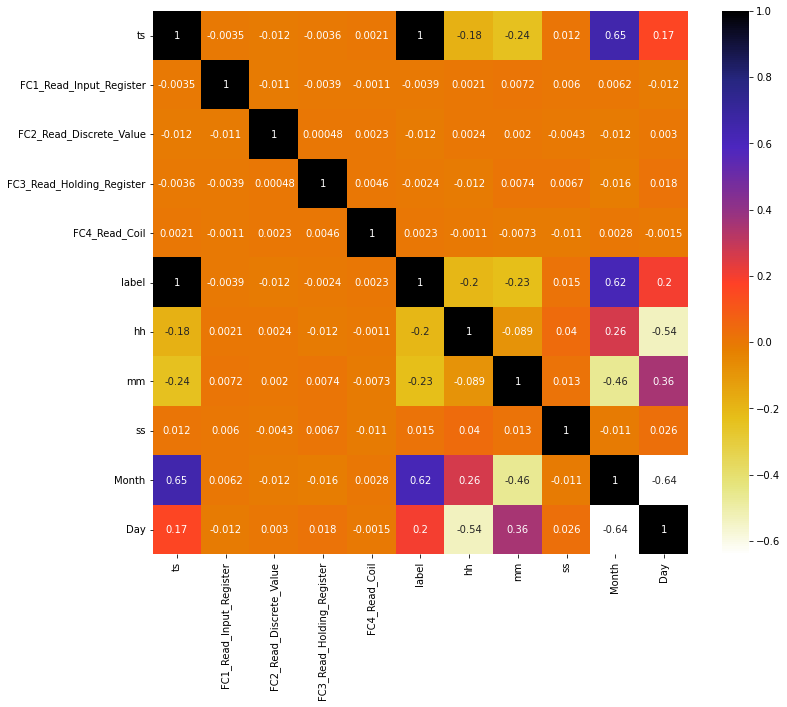

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
All4.drop(['label'],inplace=True,axis=1)

In [ ]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [ ]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


[0.97676409 0.97823163 0.97688639 0.97725327 0.97822896]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.75546e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.75513e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.75571e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.75529e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

0.9774728685083238

In [ ]:

rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1031
           1       0.97      1.00      0.99      1011
           2       1.00      1.00      1.00      6906
           3       0.93      0.99      0.96      1060
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       114

    accuracy                           0.98     10222
   macro avg       0.63      0.67      0.65     10222
weighted avg       0.96      0.98      0.97     10222

0.9784777929954999


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.20426e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

In [ ]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9592274072900315, 0.9784777929954999, 0.9684603376393812, None)

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [ ]:
val=dict(zip(num,labels))

In [ ]:
maping=set(y_train)
lebl=[val[i] for i in maping]

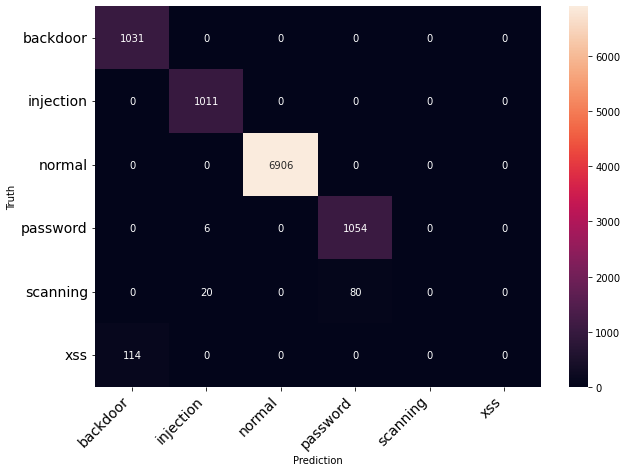

In [ ]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [ ]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.9784777929954999
specificity_score:
0.9975643389181653


# Light Dataset

In [ ]:
df_light

,ts,date,time,motion_status,light_status,label,type
0,1556246497,25-Apr-19,19:41:37,0,off,1,ddos
1,1556246502,25-Apr-19,19:41:42,1,on,1,ddos
2,1556246503,25-Apr-19,19:41:43,0,off,1,ddos
3,1556246508,25-Apr-19,19:41:48,1,on,1,ddos
4,1556246508,25-Apr-19,19:41:48,0,off,1,ddos
...,...,...,...,...,...,...,...
59483,1554160073,1-Apr-19,16:07:53,0,off,0,normal
59484,1554160073,1-Apr-19,16:07:53,1,on,0,normal
59485,1554160074,1-Apr-19,16:07:54,0,off,0,normal
59486,1554160075,1-Apr-19,16:07:55,0,off,0,normal


In [ ]:
df_light.light_status.value_counts().index

Index([' off', ' on'], dtype='object')

In [ ]:
df_light.light_status.replace(' off',0,inplace=True)
df_light.light_status.replace(' on',1,inplace=True)

In [ ]:
df_light['date']=pd.to_datetime(df_light['date'])
df_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59488 entries, 0 to 59487
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ts             59488 non-null  int64         
 1   date           59488 non-null  datetime64[ns]
 2   time           59488 non-null  object        
 3   motion_status  59488 non-null  int64         
 4   light_status   59488 non-null  int64         
 5   label          59488 non-null  int64         
 6   type           59488 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.2+ MB


In [ ]:
Time=df_light.time.str.split(':')

In [ ]:
hh=[int(i[0]) for i in Time]
mm=[int(i[1]) for i in Time]
ss=[int(i[2]) for i in Time]
df_light['hh']=hh
df_light['mm']=mm
df_light['ss']=ss

In [ ]:
df_light['Month']=df_light.date.dt.month
df_light['Day']=df_light.date.dt.day

In [ ]:
temp=df_light['type']
df_light.drop(['type','time','date'],axis=1,inplace=True)
df_light['type']=temp

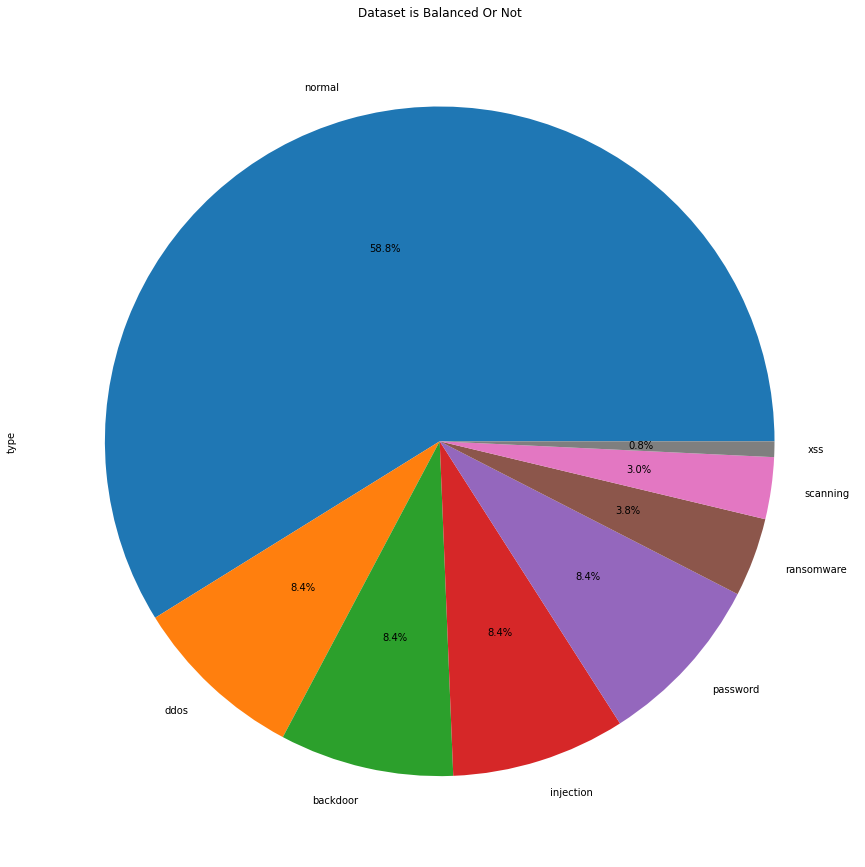

In [ ]:
df_light['type'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f%%',title='Dataset is Balanced Or Not')

In [ ]:
All5=df_light
labels=list(All5.type.value_counts().index)
All5['type']=LabelEncoder().fit_transform(All5['type'])
num=list(All5.type.value_counts().index)

In [ ]:
All5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59488 entries, 0 to 59487
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ts             59488 non-null  int64
 1   motion_status  59488 non-null  int64
 2   light_status   59488 non-null  int64
 3   label          59488 non-null  int64
 4   hh             59488 non-null  int64
 5   mm             59488 non-null  int64
 6   ss             59488 non-null  int64
 7   Month          59488 non-null  int64
 8   Day            59488 non-null  int64
 9   type           59488 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [ ]:
X=All5.iloc[:,:-1]
y=All5.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.corr()

,ts,motion_status,light_status,label,hh,mm,ss,Month,Day
ts,1.000000,-0.006764,-0.006764,0.997052,0.149581,-0.083333,-0.026949,0.592228,0.336635
motion_status,-0.006764,1.000000,1.000000,-0.006158,-0.000815,0.005767,0.002019,-0.009892,0.004610
light_status,-0.006764,1.000000,1.000000,-0.006158,-0.000815,0.005767,0.002019,-0.009892,0.004610
label,0.997052,-0.006158,-0.006158,1.000000,0.160012,-0.056753,-0.028188,0.557697,0.373837
hh,0.149581,-0.000815,-0.000815,0.160012,1.000000,0.313694,-0.048107,-0.004192,0.141943
mm,-0.083333,0.005767,0.005767,-0.056753,0.313694,1.000000,-0.039632,-0.464588,0.451839
ss,-0.026949,0.002019,0.002019,-0.028188,-0.048107,-0.039632,1.000000,0.010775,-0.039611
Month,0.592228,-0.009892,-0.009892,0.557697,-0.004192,-0.464588,0.010775,1.000000,-0.559252
Day,0.336635,0.004610,0.004610,0.373837,0.141943,0.451839,-0.039611,-0.559252,1.000000


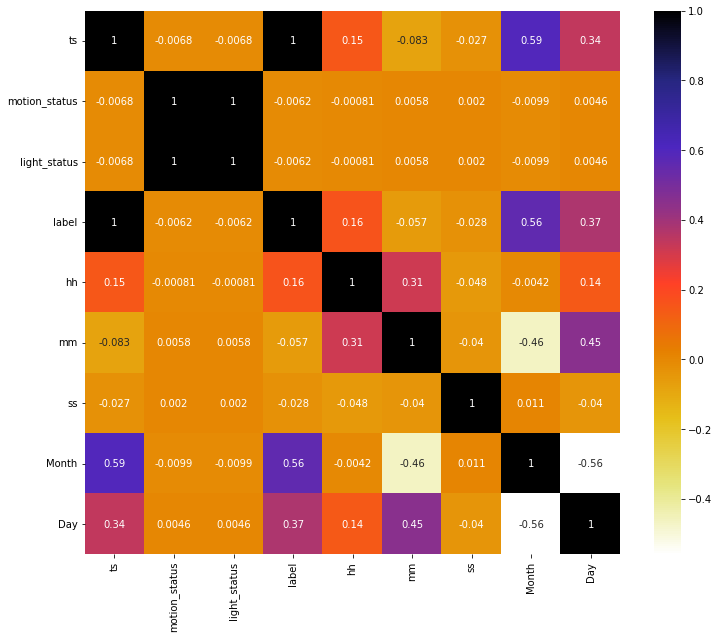

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
All5.drop(['label'],inplace=True,axis=1)

In [ ]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [ ]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.13863e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.13884e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.13911e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.13908e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.83252784 0.83263291 0.83473419 0.8329481  0.83179239]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.13919e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.8329270855221684

In [ ]:

rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       971
           1       0.45      0.72      0.55       997
           2       0.63      1.00      0.78      1051
           3       1.00      1.00      1.00      6971
           4       0.84      0.22      0.35       993
           5       0.00      0.00      0.00       431
           6       0.00      0.00      0.00       392
           7       0.00      0.00      0.00        92

    accuracy                           0.83     11898
   macro avg       0.45      0.49      0.44     11898
weighted avg       0.81      0.83      0.80     11898

0.8348461926374181


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.71118e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

In [ ]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8061363655679635, 0.8348461926374181, 0.7970434698251365, None)

In [ ]:
val=dict(zip(num,labels))

In [ ]:
maping=set(y_train)
lebl=[val[i] for i in maping]

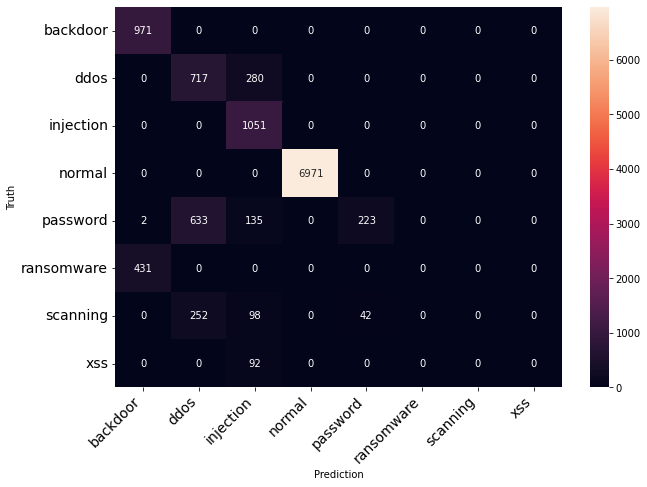

In [ ]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [ ]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.8348461926374181
specificity_score:
0.9847147471869417


# Thermo State

In [ ]:
df_thermo

,ts,date,time,current_temperature,thermostat_status,label,type
0,1556207942,25-Apr-19,8:59:02,30.577325,1,1,injection
1,1556207946,25-Apr-19,8:59:06,29.187912,1,1,injection
2,1556207946,25-Apr-19,8:59:06,30.208893,1,1,injection
3,1556207946,25-Apr-19,8:59:06,27.731392,1,1,injection
4,1556207946,25-Apr-19,8:59:06,26.211462,1,1,injection
...,...,...,...,...,...,...,...
52769,1554158155,1-Apr-19,15:35:55,26.571629,1,0,normal
52770,1554158158,1-Apr-19,15:35:58,26.473615,1,0,normal
52771,1554158160,1-Apr-19,15:36:00,26.551514,1,0,normal
52772,1554158160,1-Apr-19,15:36:00,26.517323,1,0,normal


In [ ]:
df_thermo['date']=pd.to_datetime(df_thermo['date'])
df_thermo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52774 entries, 0 to 52773
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ts                   52774 non-null  int64         
 1   date                 52774 non-null  datetime64[ns]
 2   time                 52774 non-null  object        
 3   current_temperature  52774 non-null  float64       
 4   thermostat_status    52774 non-null  int64         
 5   label                52774 non-null  int64         
 6   type                 52774 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [ ]:
Time=df_thermo.time.str.split(':')

In [ ]:
hh=[int(i[0]) for i in Time]
mm=[int(i[1]) for i in Time]
ss=[int(i[2]) for i in Time]
df_thermo['hh']=hh
df_thermo['mm']=mm
df_thermo['ss']=ss

In [ ]:
df_thermo['Month']=df_thermo.date.dt.month
df_thermo['Day']=df_thermo.date.dt.day

In [ ]:
temp=df_thermo['type']
df_thermo.drop(['type','time','date'],axis=1,inplace=True)
df_thermo['type']=temp

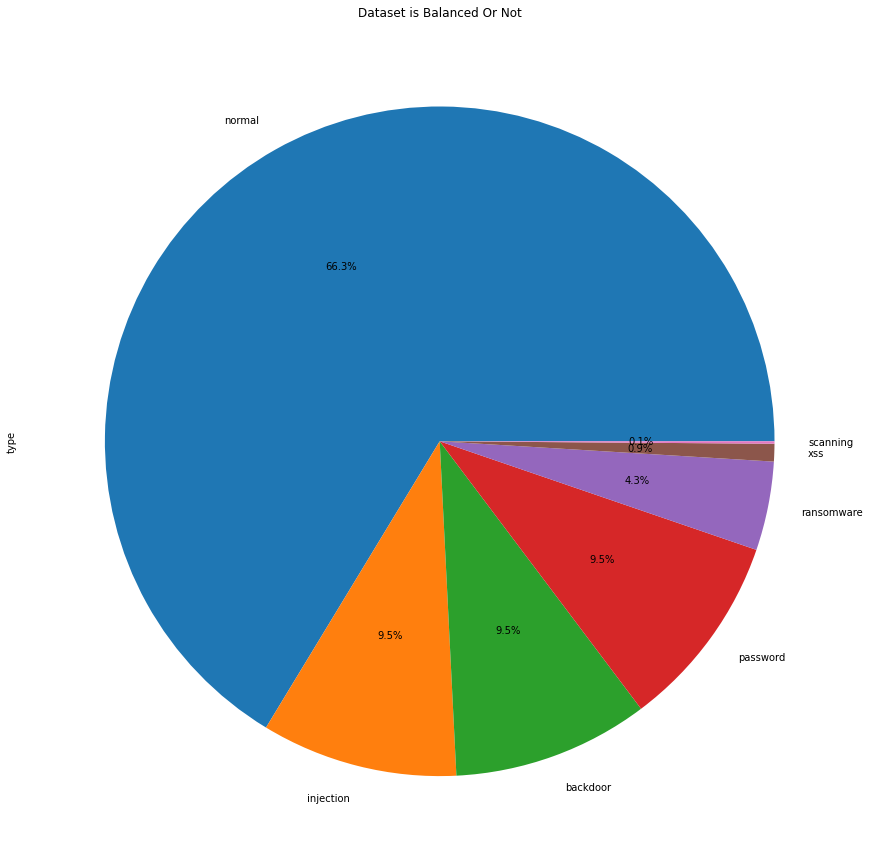

In [ ]:
df_thermo['type'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f%%',title='Dataset is Balanced Or Not')

In [ ]:
All6=df_thermo
labels=list(All6.type.value_counts().index)
All6['type']=LabelEncoder().fit_transform(All6['type'])
num=list(All6.type.value_counts().index)


In [ ]:
All6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52774 entries, 0 to 52773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ts                   52774 non-null  int64  
 1   current_temperature  52774 non-null  float64
 2   thermostat_status    52774 non-null  int64  
 3   label                52774 non-null  int64  
 4   hh                   52774 non-null  int64  
 5   mm                   52774 non-null  int64  
 6   ss                   52774 non-null  int64  
 7   Month                52774 non-null  int64  
 8   Day                  52774 non-null  int64  
 9   type                 52774 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.0 MB


In [ ]:
X=All6.iloc[:,:-1]
y=All6.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.corr()

,ts,current_temperature,thermostat_status,label,hh,mm,ss,Month,Day
ts,1.000000,-0.008128,0.033488,0.996824,0.007028,-0.063950,-0.001680,0.559767,0.310535
current_temperature,-0.008128,1.000000,0.189334,-0.007470,-0.008545,0.000400,0.003114,-0.011737,0.005878
thermostat_status,0.033488,0.189334,1.000000,0.032203,0.007973,-0.014731,-0.004176,0.045402,-0.020356
label,0.996824,-0.007470,0.032203,1.000000,0.008173,-0.034584,-0.000007,0.520616,0.352457
hh,0.007028,-0.008545,0.007973,0.008173,1.000000,0.384015,0.008248,-0.070904,0.071187
mm,-0.063950,0.000400,-0.014731,-0.034584,0.384015,1.000000,0.001638,-0.488193,0.492789
ss,-0.001680,0.003114,-0.004176,-0.000007,0.008248,0.001638,1.000000,-0.010051,0.009795
Month,0.559767,-0.011737,0.045402,0.520616,-0.070904,-0.488193,-0.010051,1.000000,-0.613732
Day,0.310535,0.005878,-0.020356,0.352457,0.071187,0.492789,0.009795,-0.613732,1.000000


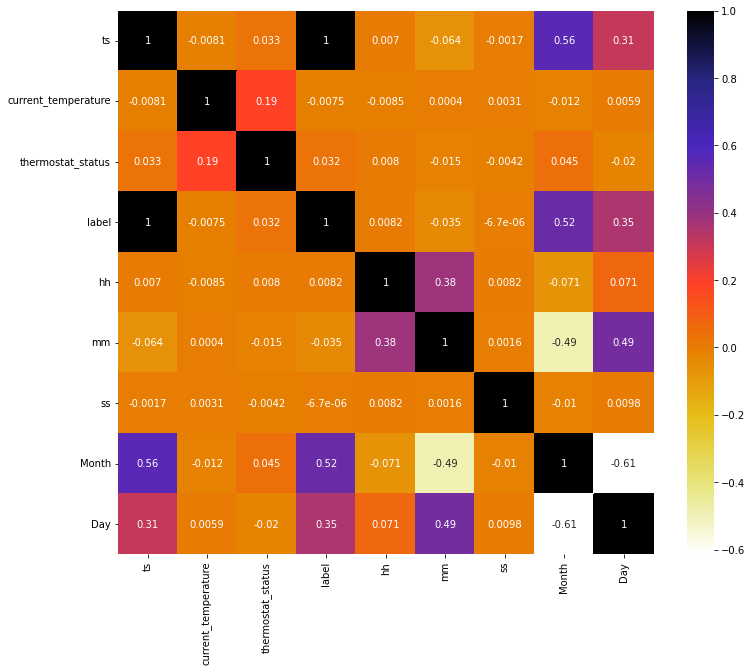

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#X_train.drop(['label'],inplace=True,axis=1)
#X_test.drop(['label'],inplace=True,axis=1)


In [ ]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [ ]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55761e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55792e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.90620559 0.90750829 0.91165324 0.90940313 0.91069525]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55719e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55727e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55706e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.9090931003138442

In [ ]:

rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       997
           1       0.66      1.00      0.79      1013
           2       1.00      1.00      1.00      7003
           3       1.00      0.59      0.74      1024
           4       1.00      0.00      0.01       405
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        98

    accuracy                           0.91     10555
   macro avg       0.62      0.51      0.48     10555
weighted avg       0.93      0.91      0.89     10555

0.9116058739933681


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.04593e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

In [ ]:
All6.drop(['label'],inplace=True,axis=1)

In [ ]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [ ]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55761e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55792e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55719e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55727e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.90620559 0.90750829 0.91165324 0.90940313 0.91069525]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.55706e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.9090931003138442

In [ ]:

rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       997
           1       0.66      1.00      0.79      1013
           2       1.00      1.00      1.00      7003
           3       1.00      0.59      0.74      1024
           4       1.00      0.00      0.01       405
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        98

    accuracy                           0.91     10555
   macro avg       0.62      0.51      0.48     10555
weighted avg       0.93      0.91      0.89     10555

0.9116058739933681


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.04593e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

In [ ]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.92913826500178, 0.9116058739933681, 0.8907152589734084, None)

In [ ]:
val=dict(zip(num,labels))

In [ ]:
maping=set(y_train)
lebl=[val[i] for i in maping]

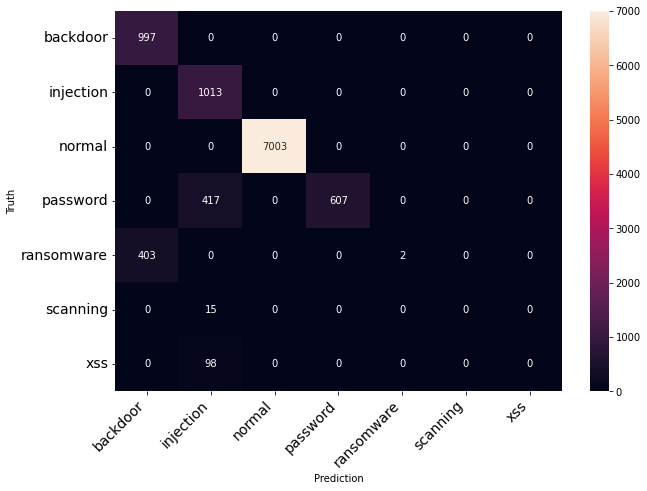

In [ ]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [ ]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.9116058739933681
specificity_score:
0.990686582317777


# Whether

In [ ]:
df_weather

,ts,date,time,temperature,pressure,humidity,label,type
0,1556238796,25-Apr-19,17:33:16,40.881866,-0.101806,38.363631,1,ddos
1,1556238796,25-Apr-19,17:33:16,44.913806,2.661616,46.141423,1,ddos
2,1556238796,25-Apr-19,17:33:16,38.295822,-2.438871,50.850643,1,ddos
3,1556238801,25-Apr-19,17:33:21,41.306586,-0.101806,38.363631,1,ddos
4,1556238801,25-Apr-19,17:33:21,44.903178,3.080849,46.141423,1,ddos
...,...,...,...,...,...,...,...,...
59255,1554166618,1-Apr-19,17:56:58,32.799434,2.204924,37.024913,0,normal
59256,1554166618,1-Apr-19,17:56:58,29.453781,-2.030547,90.297894,0,normal
59257,1554166619,1-Apr-19,17:56:59,47.185992,0.872942,37.687701,0,normal
59258,1554166623,1-Apr-19,17:57:03,43.097037,3.168207,93.647950,0,normal


In [ ]:
df_weather['date']=pd.to_datetime(df_weather['date'])
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59260 entries, 0 to 59259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ts           59260 non-null  int64         
 1   date         59260 non-null  datetime64[ns]
 2   time         59260 non-null  object        
 3   temperature  59260 non-null  float64       
 4   pressure     59260 non-null  float64       
 5   humidity     59260 non-null  float64       
 6   label        59260 non-null  int64         
 7   type         59260 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 3.6+ MB


In [ ]:
Time=df_weather.time.str.split(':')

In [ ]:
hh=[int(i[0]) for i in Time]
mm=[int(i[1]) for i in Time]
ss=[int(i[2]) for i in Time]
df_weather['hh']=hh
df_weather['mm']=mm
df_weather['ss']=ss

In [ ]:
df_weather['Month']=df_weather.date.dt.month
df_weather['Day']=df_weather.date.dt.day

In [ ]:
temp=df_weather['type']
df_weather.drop(['type','time','date'],axis=1,inplace=True)
df_weather['type']=temp

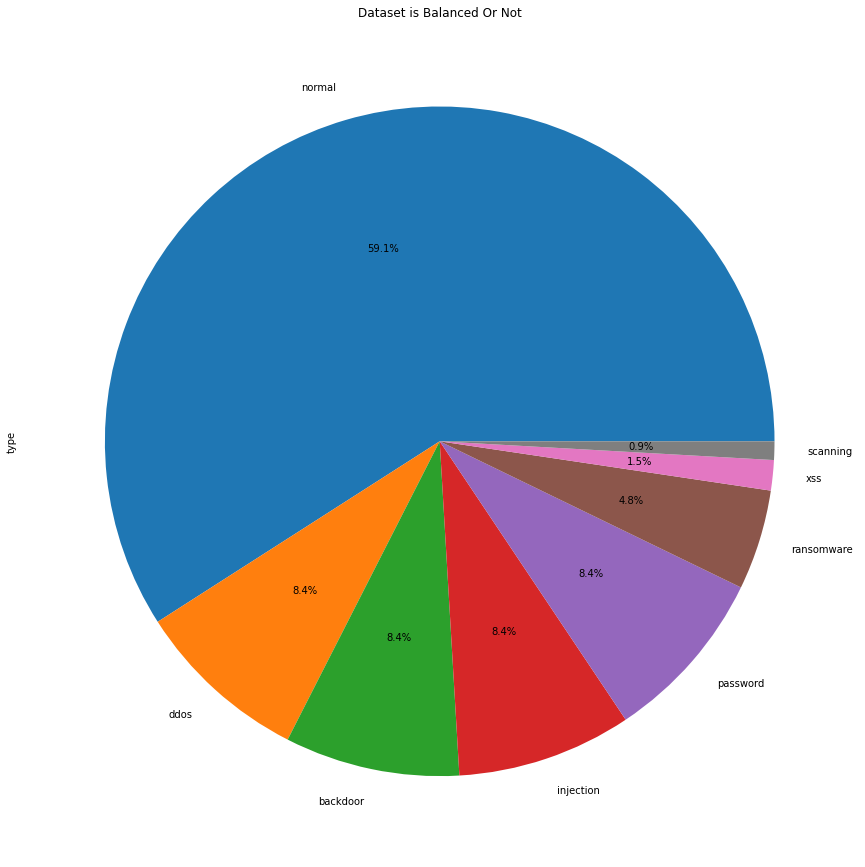

In [ ]:
df_weather['type'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f%%',title='Dataset is Balanced Or Not')

In [ ]:
All7=df_weather
labels=list(All7.type.value_counts().index)
All7['type']=LabelEncoder().fit_transform(All7['type'])
num=list(All7.type.value_counts().index)

In [ ]:
All7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59260 entries, 0 to 59259
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ts           59260 non-null  int64  
 1   temperature  59260 non-null  float64
 2   pressure     59260 non-null  float64
 3   humidity     59260 non-null  float64
 4   label        59260 non-null  int64  
 5   hh           59260 non-null  int64  
 6   mm           59260 non-null  int64  
 7   ss           59260 non-null  int64  
 8   Month        59260 non-null  int64  
 9   Day          59260 non-null  int64  
 10  type         59260 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 5.0 MB


In [ ]:
X=All7.iloc[:,:-1]
y=All7.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [ ]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.11524e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.11562e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.11612e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.1156e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.92396119 0.9199536  0.91763341 0.92395317 0.91583166]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.11536e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.9202666058813083

In [ ]:

rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       969
           1       0.74      0.83      0.78      1013
           2       0.81      1.00      0.89       985
           3       1.00      1.00      1.00      7044
           4       0.83      0.82      0.82      1004
           5       1.00      0.42      0.59       539
           6       0.00      0.00      0.00       106
           7       0.00      0.00      0.00       192

    accuracy                           0.92     11852
   macro avg       0.64      0.63      0.62     11852
weighted avg       0.90      0.92      0.90     11852

0.9152885588930139


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69247e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

In [ ]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9020416776950877, 0.9152885588930139, 0.901184002876205, None)

In [ ]:
val=dict(zip(num,labels))

In [ ]:
maping=set(y_train)
lebl=[val[i] for i in maping]

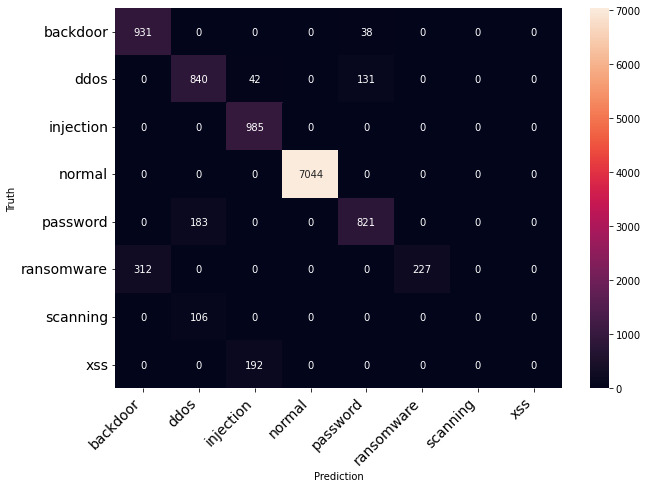

In [ ]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [ ]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.9152885588930139
specificity_score:
0.9922679088029287
